In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#Step1: Load Dataset 

twitter_data = pd.read_csv("twitter_dataset.csv")
dataframe = twitter_data[['Tweet', 'Type']]
print(twitter_data.head())
print(twitter_data.describe())
print(list(twitter_data.columns))

      Id  ...     Type
0  10091  ...  Quality
1  10172  ...  Quality
2   7012  ...  Quality
3   3697  ...     Spam
4  10740  ...     Spam

[5 rows x 8 columns]
                 Id     following     followers        actions    is_retweet
count  11968.000000  1.182300e+04  1.195200e+04    9195.000000  11967.000000
mean    6292.273730  4.787110e+03  3.668763e+05    7314.563893      0.223949
std     3632.510153  3.158289e+04  3.973314e+06   16468.215132      0.416906
min        1.000000  0.000000e+00  0.000000e+00       0.000000      0.000000
25%     3150.750000  0.000000e+00  0.000000e+00      10.000000      0.000000
50%     6289.500000  5.100000e+01  8.415000e+02    1487.000000      0.000000
75%     9442.250000  3.635000e+03  1.328775e+04    7265.500000      0.000000
max    12598.000000  1.600000e+06  1.050000e+08  165865.000000      1.000000
['Id', 'Tweet', 'following', 'followers', 'actions', 'is_retweet', 'location', 'Type']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


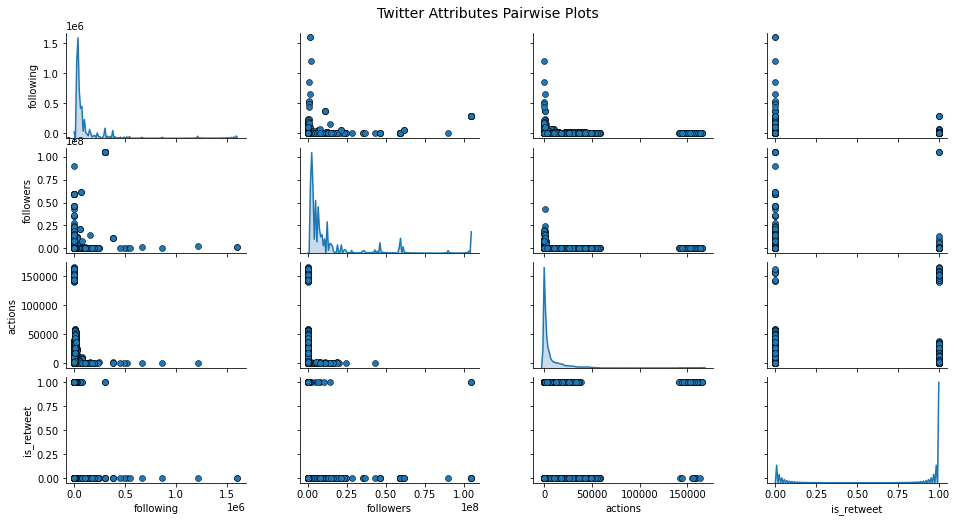

In [3]:
# Pair-wise Scatter Plots
import seaborn as sns

cols = ['following', 'followers', 'actions', 'is_retweet', 'location', 'Type']
pp = sns.pairplot(twitter_data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Twitter Attributes Pairwise Plots', fontsize=14)

In [4]:
#Splitting in to Training and Test Data

y = dataframe.Type
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9574, 2) (9574,)
(2394, 2) (2394,)


In [7]:
#Extracting Features
cv = CountVectorizer()  
features = cv.fit_transform(X_train['Tweet'])

#Building a model

# tuned_parameters = {'kernel' : ['linear', 'rbf'], 
#                      'gamma' : [1e-3, 1e-4],
#                      'C' : [1, 10, 100, 1000]
#                      }

tuned_parameters = {'kernel' : ['rbf'], 
                     'gamma' : [1e-4],
                     'C' : [1000]
                     }

model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(features, y_train)

print(model.best_params_)


#Step5: Test Accuracy

features_test = cv.transform(X_test['Tweet'])
prediction = model.predict(features_test)
print(prediction)
print("Accuracy : ", model.score(features_test, y_test))


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
['Spam' 'Quality' 'Spam' ... 'Quality' 'Spam' 'Quality']
Accuracy :  0.9335839598997494


In [8]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, prediction, labels=["Spam", "Quality"]))

# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, prediction, labels=["Spam", "Quality"]))

[[1041  111]
 [  48 1194]]
              precision    recall  f1-score   support

        Spam       0.96      0.90      0.93      1152
     Quality       0.91      0.96      0.94      1242

    accuracy                           0.93      2394
   macro avg       0.94      0.93      0.93      2394
weighted avg       0.93      0.93      0.93      2394

